# TASK1

In [426]:
# Importing all relevant libraries

import gzip
import numpy as np
import pandas as pd

f_image = gzip.open('train-images-idx3-ubyte.gz','r') # Reading the Training image data

image_size = 28 #number of pixels
num_images = 60000 #Total number of images

#Reading the above data in an array and reshaping into 60000 x 784, such that each row represents a 
#single image and column represents pixel value for that image

f_image.read(16)
buf = f_image.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)
data = data.reshape(60000, 784)
    
image_data = pd.DataFrame(data)  #saving this train data array in a dataframe
image_data['label'] = 0 #adding an empty label column to the image_data


In [427]:
# Reading the labels of the training data into an array

f_label = gzip.open('train-labels-idx1-ubyte.gz','r')  #reading the labels of the training data set
f_label.read(8)

for i in range(0,60000):   
    buf = f_label.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    image_data.iloc[i, 784] = labels #adding this label data to the label column of the image_data data frame created in above cell

### The training data including the labels looks like:

In [428]:
image_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


### CALCULATING MEAN AND STANDARD DEVIATION

In [429]:
mean = image_data.groupby('label', as_index=False).mean() #Finding mean vector groupbed by each label
std = image_data.groupby('label', as_index=False).std() #Finding standard deviation vector groupbed by each label
mean_arr = mean.iloc[:,1:785].to_numpy().reshape(10,28,28) #reshaping mean vector 
std_arr = std.iloc[:,1:785].to_numpy().reshape(10,28,28) #reshaping standard deviation vector 

### Plotting Mean of the features for each 10 categories

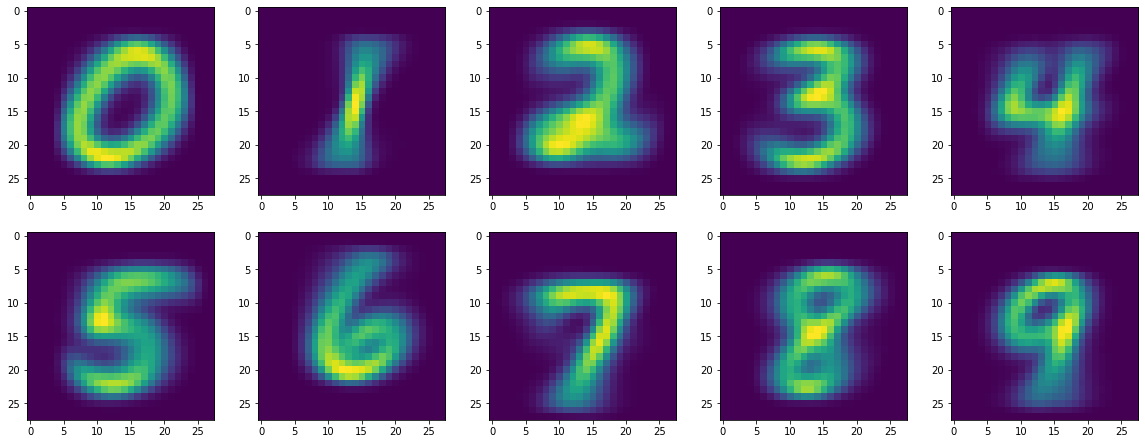

In [430]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20)) 
for i in range(10):
    image = np.asarray(mean_arr[i]).squeeze()
    plt.subplot(5,5,i+1)    
    plt.imshow(image)

plt.show()

### Plotting Standard deviation of the features for each 10 categories

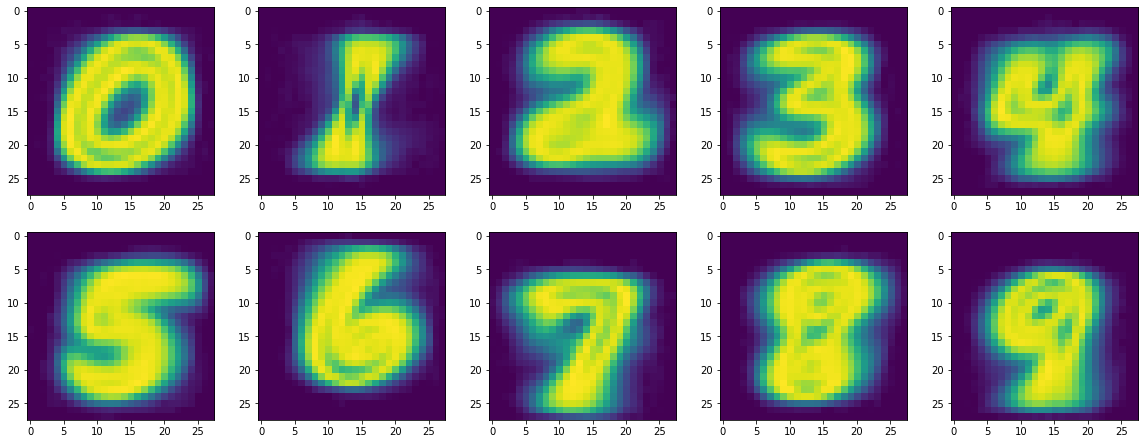

In [431]:
plt.figure(figsize=(20,20)) 
for i in range(10):
    image = np.asarray(std_arr[i]).squeeze()
    plt.subplot(5,5,i+1)    
    plt.imshow(image)

plt.show()

In [255]:
################### CALCULATE MEAN VECTOR AND COVARIANCE MATRIX FOR ALL CATEGORIES USING GAUSSIAN METHOD (ALTERNATIVE METHOD) #############

# phi = np.zeros(10)
# mu = np.zeros((10, 784))
# sigma = np.zeros((10, 784, 784))
# for label in range(10):  
#     data_category = image_data[image_data['label'] == label]
#     phi[label] = float(len(data_category)/ 60000)
#     mu[label] = np.mean(data_category, axis=0).to_numpy()[:784]
#     sigma[label] = np.cov(data_category.iloc[:, :784], rowvar=0)


(10, 28, 28)

# TASK 2

### CALCULATE PRIOR PROBABILITIES AND COVARIANCE MATRIX FOR ALL CATEGORIES USING NAIVE BAYES METHOD

In [432]:
std1 = std_arr.reshape(10, 784) #reshaping standard deviation calculated in task 1
sigma = np.zeros((10, 784, 784)) #initiating an array for the Covariance Matrix
phi = np.zeros(10) #initiating an empty array for prior probabilities
mu = mean_arr.reshape(10, 784) #reshaping mean calculated in task 1

for label in range(10):
    sigma[label] = np.diag(std1[label])  #Creating covariance matrix from standard deviation calculated in TASK1
    data_category = image_data[image_data['label'] == label] #Filtering the dataframe to contain only label related data
    phi[label] = float(len(data_category)/ 60000)     

### Creating the components of the discriminant function

$$ g_i(x) = x^tW_ix + w_i^tx + w_{i0} $$

In [433]:
# calculating Wi, wi and wi0

W = np.zeros((10, 784, 784))  #creating an empty array for Wi
w = np.zeros((10, 784, 1))  #creating an empty array for wi
constant = np.zeros(10)  #creating an empty array for wi0
for i in range(10):
    sigma_inv = np.linalg.inv(sigma[i]+0.00008*np.identity(784, dtype = float)) # adding a small identity matrix to Covariance matrix because 
                                                                                # covariance matrix is singular and therefore inverse doesn't exist
    W[i] = (-0.5)*sigma_inv
    w[i] = np.matmul(sigma_inv,mu[[i]].T)
    constant[i] = (-0.5*np.matmul(np.matmul(mu[[i]], sigma_inv), mu[[i]].T)) - (0.5*np.log(np.linalg.det(sigma[i]+(0.00008*np.identity(784, dtype = float))))) + np.log(phi[i])

### COMPUTING DISCRIMINANT FUNCTION

In [434]:
def discriminant(x):
    g = []
    for i in range(10):
        g.append(np.matmul(np.matmul(x.T,W[i]),x) + (np.matmul(w[i].T,x)) + constant[i])
    return g.index(max(g))    
    

### Reading test data and Predicting labels using discriminant function

In [435]:
f_image = gzip.open('t10k-images-idx3-ubyte.gz','r') 

image_size = 28 #pixel size
num_images = 10000 #number of test images

#Reading and storing the test data in numpy array

f_image.read(16)
buf = f_image.read(image_size * image_size * num_images)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_images, image_size, image_size)
test_data = test_data.reshape(10000, 784) 
test_im = pd.DataFrame(test_data) #storing test images in the dataframe 
test_im['predicted_label'] = test_im.apply(discriminant, axis = 1) # Predicting the label by applying the discriminant function to each row

In [436]:
test_im['Actual_label'] = 0 # Creating an empty 'Actual_label' column
f_label = gzip.open('t10k-labels-idx1-ubyte.gz','r')  # reading the labels of the test data set
f_label.read(8)

for i in range(0,10000):   
    buf = f_label.read(1)
    labels_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    test_im.iloc[i, 785] = labels_test # adding True label data to the 'Actual_label' column

In [437]:
test_im.head() #preview of the test data after adding predicted label column and actual label column

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,predicted_label,Actual_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4


## PERFORMANCE EVALUATION

In [438]:
confusion_matrix = pd.crosstab(test_im.predicted_label, test_im.Actual_label)
confusion_matrix

Actual_label,0,1,2,3,4,5,6,7,8,9
predicted_label,,,,,,,,,,
0,900,0,12,4,4,20,16,0,10,5
1,0,996,2,1,0,0,3,7,3,2
2,6,23,895,49,14,10,25,20,19,7
3,3,2,18,837,2,74,0,7,50,11
4,1,1,11,2,776,11,5,16,9,72
5,40,36,8,46,20,720,43,3,52,14
6,13,5,23,4,17,14,858,1,4,0
7,1,0,8,11,4,4,0,850,3,19
8,16,72,54,39,36,27,8,44,801,34


The diagonal elements of the confusion matrix determines the true positive for each class. Sum of all elements in a column of a particular class of actual label except the diagonal element gives the False Negative for that class. Sum of all elements in a row of a particular class of predicted label except the diagonal element gives the False Positive for that class. The remaining elements sum to the True Negative. 
The accuracy is sum of all conrrectly predicted values divided by total number of observations

In [439]:
accuracy = np.diag(confusion_matrix).sum()/confusion_matrix.sum().sum()
print(f"The Accuracy of the Naive Bayes method is {accuracy:.4f}")

The Accuracy of the Naive Bayes method is 0.8478


The Accuracy of the Naive Bayes method is 84.78%

In [440]:
# Defining a function to calculate metrics for each label using confusion matrix 

def metrics(conf_mat, label): 
    TP = conf_mat.iloc[label, label] # Number of True positive labels
    FP = conf_mat.iloc[label, :].sum() - TP # Number of False positive labels
    FN = conf_mat.iloc[:, label].sum() - TP # Number of False Negative labels
    TN = conf_mat.sum().sum() - TP - FP - FN # Number of True Negative labels
    return TP, FP, FN, TN

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

$$ Precision = \frac{TP}{TP + FP} $$

$$ Recall = \frac{TP}{TP + FN} $$

$$ F1-Score = \frac{2 * (Recall * Precision)}{(Recall + Precision)} $$

In [441]:
metric_df = pd.DataFrame(columns=['Label', 'Accuracy', 'Precision', 'Recall', 'F1_Score']) # Creating an empty dataframe to store all metrics for each label

for i in range(10):
    metric_df.loc[i, 'Label'] = i
    TP, FP, FN, TN = metrics(confusion_matrix, i)
    Accuracy = (TP+TN)/confusion_matrix.sum().sum()
    metric_df.loc[i, 'Accuracy'] = Accuracy
    Precision = TP/(TP+FP)
    metric_df.loc[i, 'Precision'] = Precision
    Recall = TP/(TP+FN)
    metric_df.loc[i, 'Recall'] = Recall
    F1_Score = (2*Precision*Recall)/(Precision+Recall)
    metric_df.loc[i, 'F1_Score'] = F1_Score

metric_df.set_index('Label', inplace=True)    
metric_df

,Accuracy,Precision,Recall,F1_Score
Label,,,,
0,0.9849,0.92688,0.918367,0.922604
1,0.9843,0.982249,0.877533,0.926943
2,0.969,0.838015,0.867248,0.852381
3,0.966,0.833665,0.828713,0.831182
4,0.9666,0.858407,0.790224,0.822906
5,0.9566,0.733198,0.807175,0.76841
6,0.9819,0.913738,0.895616,0.904586
7,0.9772,0.944444,0.826848,0.881743
8,0.9497,0.708223,0.822382,0.761045


#### Why Naive Bayes doesn't perform as good as many other methods on LeCun's web page?

In Naive Bayes, all features are assumed to be independent. Therefore there is no consideration for relationship between the features, the method only assumes relationship between features and the output labels. This limits the training ability of the model. The model is not able to train properly and unable to get enough information for more accurate prediction. But in Lecun's method this isn't the case.